# Spatial Coverage

In [2]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import numpy as np
from matplotlib.font_manager import fontManager
from collections import Counter

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)



## Spatial metadata information


In [3]:
time_field = ['temp_res','start_time','end_time','spatial','x_min','x_max','y_min','y_max','spatial_res']

spatial = []

for i in o_dataset:  #時空資訊
  temp = {key: None for key in time_field}
  for field in time_field:
    temp[field]=i[field] if i.get(field) is not None else ''  #有時不會有欄位，先確保有欄位再拿值
  spatial.append(temp)


temp_res = [i['temp_res'] for i in spatial]  #時間解析度
temp_res_count = Counter(temp_res)
new_temp_res_count = Counter({k if k != "" else "undefined": v for k, v in temp_res_count.items()})
print('時空解析度',new_temp_res_count)

start_time = [i['start_time'][:4] for i in spatial]  # 開始時間 抓年份而已
start_time_count = Counter(start_time)
new_start_time_count = Counter({k if k != "" else "undefined": v for k, v in start_time_count.items()})
print('起始時間',new_start_time_count)

end_time = [i['end_time'][:4] for i in spatial]  # 結束時間
end_time_count = Counter(end_time)
new_end_time_count = Counter({k if k != "" else "undefined": v for k, v in end_time_count.items()})
print('結束時間',new_end_time_count)

during = []      #一個專案通常多久
for i in spatial:
  if i['start_time'] != '' and i['end_time'] != '':
    during.append(int(i['end_time'][:4])-int(i['start_time'][:4]))
during_time_count = Counter(during)
new_during_time_count = Counter({k if k != "" else "undefined": v for k, v in during_time_count.items()})
print('持續時間',new_during_time_count)

ss = []       #spatial 中繪圖形狀
for i in spatial:
  if i['spatial']:
    new = json.loads(i['spatial'])
    ss.append(new['type'])
new_ss = Counter(ss)
print('標記形狀',new_ss)

locations = [] #經緯度
for i in spatial:
  if i['x_min'] and i['x_max'] and i['y_min'] and i['y_max']:
    x_avr = (float(i['x_min']) + float(i['x_max']))/2  #mean
    y_avr = (float(i['y_min']) + float(i['y_max']))/2
    locations.append({x_avr,y_avr})

print('經緯度',locations)

spatial_res = [i['spatial_res'] for i in spatial]   #時間解析度
spatial_res_count = Counter(spatial_res)
new_spatial_res_count = Counter({k if k != "" else "undefined": v for k, v in spatial_res_count.items()})
print('時間解析度',new_spatial_res_count)

時空解析度 Counter({'undefined': 1384, 'yearly': 284, 'daily': 110, 'monthly': 63})
起始時間 Counter({'undefined': 1295, '2019': 69, '2022': 50, '2021': 45, '2020': 43, '2018': 35, '2023': 26, '2012': 25, '2013': 16, '2014': 14, '2010': 13, '2008': 12, '2015': 12, '2009': 11, '2000': 11, '1926': 11, '2011': 10, '2017': 9, '1945': 9, '1624': 7, '1976': 7, '2001': 6, '1875': 5, '1895': 5, '1665': 5, '2016': 4, '1960': 4, '1661': 4, '1870': 3, '1975': 3, '1783': 3, '1912': 3, '1979': 3, '1900': 3, '1662': 3, '2002': 2, '2007': 2, '1961': 2, '2004': 2, '1793': 2, '1871': 2, '1840': 2, '1897': 2, '1736': 2, '1626': 2, '1644': 2, '1623': 2, '2005': 1, '1981': 1, '2003': 1, '2006': 1, '1995': 1, '1860': 1, '1967': 1, '1795': 1, '1877': 1, '1872': 1, '1874': 1, '1977': 1, '1980': 1, '1970': 1, '1932': 1, '1800': 1, '1723': 1, '1664': 1, '1654': 1, '1884': 1, '1935': 1, '1947': 1, '1974': 1, '1669': 1, '1782': 1, '1636': 1, '1652': 1, '1648': 1, '1640': 1, '1634': 1, '1629': 1, '1625': 1, '1999': 1})
結束

## 時空解析度

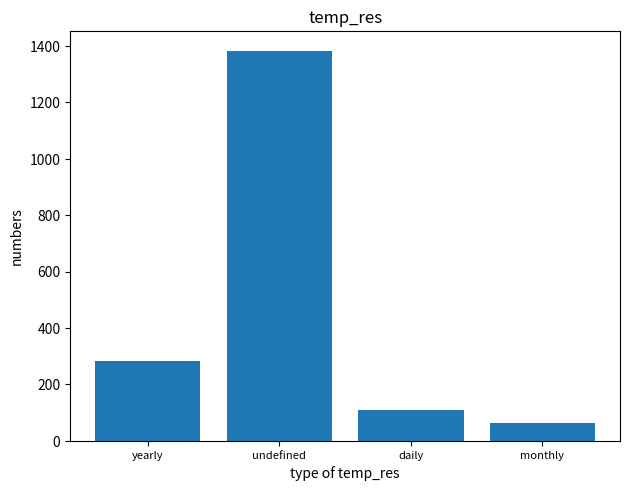

In [4]:

temp_res_k = [k for k,v in new_temp_res_count.items()]
temp_res_v = [v for k,v in new_temp_res_count.items()]

plt.bar(temp_res_k, temp_res_v)
plt.xlabel('type of temp_res')
plt.ylabel('numbers')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.title('temp_res')

plt.show()

## Geographical distribution

In [5]:
import folium

map_center = (23.555,120.5)   # Choose any location as the map center
map_object = folium.Map(location=map_center, zoom_start=6)

locations = [tuple(loc) for loc in locations if len(loc) == 2]
# Add markers for each location on the map
for loc in locations:
    folium.Marker(loc).add_to(map_object)

# Save the map to an HTML file
# map_file = "map.html"
# map_object.save("map.html")
map_object

